In [49]:
# Data processing
import pandas as pd
import numpy as np

# Data visualizations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
download_data = True
if download_data:
    from google_drive_downloader import GoogleDriveDownloader as gdd

    gdd.download_file_from_google_drive(file_id='1bSdV7zV_prIx2G_sa0an3-6kyX3bfc_f',
                                    dest_path='./data/used_cars_250k_FROMGOOGLE.zip',
                                    unzip=True)

In [50]:
unzip_data = False
if unzip_data:
    from zipfile import ZipFile
    # Create a ZipFile Object and load sample.zip in it
    with ZipFile('data/used_cars_250k.zip', 'r') as zipObj:
        # Extract all the contents of zip file in different directory
        zipObj.extractall('data')

In [51]:
# Do not limit column width in pandas df
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', 500)

data_dir = './data/'
# Open file
data = pd.read_csv(data_dir + 'used_cars_250k.csv', index_col="id")
# data = data.sample(frac=1).reset_index(drop=True)

In [52]:
# data[data['main_picture_url']]
no_color = data[data['listing_color'] == 'UNKNOWN']
# no_color
no_color['main_picture_url'].isna().sum()

5294

#### Split to train & test

In [53]:
data_len = len(data)
train_len = int(0.8 * data_len)
train_data = data[:train_len]
test_data = data[train_len:]

### Exploration & Visualization

In [54]:
train_data.head()

vin back_legroom  bed bed_height bed_length  \
id                                                                   
616283   1GCRYEED6LZ342559      35.2 in  NaN         --    79.4 in   
1850151  1G6AU5S85K0137336      35.4 in  NaN        NaN        NaN   
2806395  WAUYNGF5XJN006230      33.1 in  NaN        NaN        NaN   
320098   4T1F11BK0LU013237        38 in  NaN        NaN        NaN   
2342929  1FMCU0H63LUB66225      40.7 in  NaN        NaN        NaN   

               body_type     cabin           city  city_fuel_economy  \
id                                                                     
616283      Pickup Truck  Crew Cab        Wooster                NaN   
1850151            Sedan       NaN         Dayton               16.0   
2806395      Convertible       NaN  Beverly Hills               24.0   
320098             Sedan       NaN   Mount Laurel                NaN   
2342929  SUV / Crossover       NaN     Georgetown               27.0   

         combine_fuel_economy  daysonmarket dealer_zip  \
id                                                       
616283                    NaN            13      44691   
1850151                   NaN           548      45434   
2806395                   NaN             7      90211   
320098                    NaN            22       8054   
2342929                   NaN            24      78627   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [55]:
train_data.describe()

,city_fuel_economy,combine_fuel_economy,daysonmarket,engine_displacement,highway_fuel_economy,horsepower,is_certified,latitude,listing_id,longitude,mileage,owner_count,price,savings_amount,seller_rating,sp_id,vehicle_damage_category,year
count,166963.000000,0.0,200000.000000,188299.000000,166963.000000,188299.000000,0.0,200000.000000,2.000000e+05,200000.000000,190251.000000,98829.000000,2.000000e+05,200000.000000,197232.000000,199993.000000,0.0,200000.000000
mean,22.692058,NaN,76.147910,2970.029050,29.480759,248.255105,NaN,37.004608,2.754922e+08,-90.605683,31163.191836,1.534580,3.000463e+04,550.986505,4.269095,232670.970769,NaN,2017.722590
std,8.782580,NaN,108.944464,1346.853293,7.764411,90.490149,NaN,4.992714,8.902056e+06,13.909267,45424.072882,0.924395,2.020242e+04,1031.359053,0.514804,132476.669964,NaN,4.211003
min,9.000000,NaN,0.000000,700.000000,11.000000,65.000000,NaN,18.398800,8.393878e+07,-157.838000,0.000000,1.000000,2.000000e+02,0.000000,1.000000,41593.000000,NaN,1923.000000
25%,18.000000,NaN,14.000000,2000.000000,25.000000,175.000000,NaN,33.511600,2.745549e+08,-97.062200,6.000000,1.000000,1.849100e+04,0.000000,4.000000,63211.000000,NaN,2017.000000
50%,21.000000,NaN,36.000000,2500.000000,29.000000,245.000000,NaN,37.942600,2.785323e+08,-87.251700,8161.000000,1.000000,2.650000e+04,0.000000,4.341463,281404.000000,NaN,2020.000000
75%,26.000000,NaN,82.000000,3600.000000,33.000000,301.000000,NaN,41.028900,2.804444e+08,-80.378900,43700.000000,2.000000,3.839800e+04,789.000000,4.600000,336110.000000,NaN,2020.000000
max,127.000000,NaN,2337.000000,8400.000000,127.000000,1001.000000,NaN,48.923700,2.820222e+08,-66.078500,399578.000000,19.000000,1.995900e+06,56140.000000,5.000000,440798.000000,NaN,2021.000000


#### Dataset Size

In [56]:
train_data.shape

(200000, 66)

#### Columns & Data types

In [57]:
train_data.dtypes

vin                     object
back_legroom            object
bed                     object
bed_height              object
bed_length              object
                         ...  
wheel_system            object
wheel_system_display    object
wheelbase               object
width                   object
year                     int64
Length: 66, dtype: object

In [58]:
features_desc = '''vin: Vehicle Identification Number is a unique encoded string for every vehicle. A vehicle identification number (VIN) (also called a chassis number or frame number) is a unique code, including a serial number, used by the automotive industry to identify individual motor vehicles, towed vehicles, motorcycles, scooters and mopeds, as defined in ISO 3779 (content and structure) and ISO 4030 (location and attachment).
back_legroom: Legroom in the rear seat measured in inches.
bed: Category of bed size (open cargo area) in pickup truck. Null usually means the vehicle isn't a pickup truck.
bed_height: Height of bed in inches.
bed_length: Length of bed in inches.
body_type: Body Type of the vehicle. Like Convertible, Hatchback, Sedan, etc.
cabin: Category of cabin size (open cargo area) in pickup truck. Eg: Crew Cab, Extended Cab, etc.
city: City where the car is listed. Eg: Houston, San Antonio, etc.
city_fuel_economy: Fuel economy in city traffic in km per litre.
combine_fuel_economy: Combined fuel economy is a weighted average of City and Highway fuel economy in km per litre.
daysonmarket: Days since the vehicle was first listed on the website.
dealer_zip: Zipcode of the dealer.
description: Vehicle description on the vehicle's listing page.
engine_cylinders: The engine configuration. Eg: I4, V6, etc.
engine_displacement: Engine displacement is the measure of the cylinder volume swept by all of the pistons of a piston engine, excluding the combustion chambers.
engine_type: The engine configuration. Eg: I4, V6, etc.
exterior_color: Exterior color of the vehicle, usually a fancy one same as the brochure.
fleet: Whether the vehicle was previously part of a fleet.
frame_damaged: Whether the vehicle has a damaged frame.
franchise_dealer: Whether the dealer is a franchise dealer.
franchise_make: The company that owns the franchise.
front_legroom: The legroom in inches for the passenger seat.
fuel_tank_volume: Fuel tank's filling capacity in gallons.
fuel_type: Dominant type of fuel ingested by the vehicle.
has_accidents: Whether the vin has any accidents registered.
height: Height of the vehicle in inches.
highway_fuel_economy: Fuel economy in highway traffic in km per litre.
horsepower: Horsepower is the power produced by an engine.
interior_color: Interior color of the vehicle, usually a fancy one same as the brochure.
isCab: Whether the vehicle was previously taxi/cab.
is_certified: Whether the vehicle is certified. Certified cars are covered through warranty period.
is_cpo: Pre-owned cars certified by the dealer. Certified vehicles come with a manufacturer warranty for free repairs for a certain time period.
is_new: If True means the vehicle was launched less than 2 years ago.
is_oemcpo: Pre-owned cars certified by the manufacturer.
latitude: Latitude from the geolocation of the dealership.
length: Length of the vehicle in inches.
listed_date: The date the vehicle was listed on the website. Does not make daysonmarket obsolete. The prices is dayson_market days after the listed date.
listing_color: Dominant color group from the exterior color.
listing_id: Listing id from the website.
longitude: Longitude from the geolocation of the dealership.
main_picture_url: URL of the vehicle's picture.
major_options: Optional packages of the vehicle.
make_name: Vehicle's brand.
maximum_seating: Total number of seats.
mileage: Refers to the distance that the vehicle has travelled, measured in miles.
model_name: Model name of the vehicle.
owner_count: Number of owners the vehicle has had along its life.
power: Maximum power of the vehicle and the rpm to develop the power.
price: Sale price of the vehicle on the website.
salvage: In North America, a salvage title is a form of vehicle title branding, which notes that the vehicle has been damaged and/or deemed a total loss by an insurance company that paid a claim on it.
savings_amount: Non defined variable.
seller_rating: The Seller Rating is created by data received from buyers in an effort to measure the quality of the experience you provide your customers.
sp_id: Dealer id.
sp_name: Dealer name.
theft_title: Vehicle that was stolen and later recovered.
torque: Torque indicates the force to which the drive shaft is subjected. Also the revolutions needed to reach the maximum torque.
transmission: Type of transmission, such as Automatic, Manual, etc.
transmission_display: Number of gears and type of transmission.
trimId: Number of a particular version of a model with a particular set of configuration.
trim_name: Name of a particular version of a model with a particular set of configuration.
vehicle_damage_category: Category of a vehicle's damage, such as Category A meaning a 'Scrap' car.
wheel_system: Traction system of a vehicle, such as AWD or FWD.
wheel_system_display: Traction system of a vehicle, such as All Wheel Drive or Front Wheel Drive.
wheelbase: The distance between the front and rear axles of a vehicle.
width: The distance between both sides of a vehicle.
year: The year the car was built.'''

lines = features_desc.split('\n')

id, description = [],[]
for line in lines:
  splitted = line.split(": ", 1)
  id.append(splitted[0])
  description.append(splitted[1])
df = pd.DataFrame({'Column Name' : id, 'Description' : description})
# df = df.style.set_properties(**{'text-align': 'left'})
df
        

,Column Name,Description
0,vin,"Vehicle Identification Number is a unique encoded string for every vehicle. A vehicle identification number (VIN) (also called a chassis number or frame number) is a unique code, including a serial number, used by the automotive industry to identify individual motor vehicles, towed vehicles, motorcycles, scooters and mopeds, as defined in ISO 3779 (content and structure) and ISO 4030 (location and attachment)."
1,back_legroom,Legroom in the rear seat measured in inches.
2,bed,Category of bed size (open cargo area) in pickup truck. Null usually means the vehicle isn't a pickup truck.
3,bed_height,Height of bed in inches.
4,bed_length,Length of bed in inches.
...,...,...
61,wheel_system,"Traction system of a vehicle, such as AWD or FWD."
62,wheel_system_display,"Traction system of a vehicle, such as All Wheel Drive or Front Wheel Drive."
63,wheelbase,The distance between the front and rear axles of a vehicle.
64,width,The distance between both sides of a vehicle.


### Data Cleaning

##### major_options and torque are tricky columns to deal with:

In [59]:
train_data['major_options'].head()

id
616283                                                                                                                                                                                                                                      ['Bluetooth', 'Backup Camera']
1850151                                                                                                                                                                   ['Leather Seats', 'Sunroof/Moonroof', 'Navigation System', 'Preferred Package', 'Backup Camera']
2806395                                                                                                                                                              ['Navigation System', 'Alloy Wheels', 'Bluetooth', 'Backup Camera', 'Heated Seats', 'Luxury Package']
320098     ['Leather Seats', 'Sunroof/Moonroof', 'Navigation System', 'Adaptive Cruise Control', 'Alloy Wheels', 'Blind Spot Monitoring', 'Heat Package', 'Heated Seats', 'Android Auto', 'Cold Weat

we will separate them into a list:

In [60]:
import ast
def convert_to_array(string_value):
    try: 
        return ast.literal_eval(string_value)
    except:
        return []

train_data['major_options'] = train_data['major_options'].apply(convert_to_array) 
test_data['major_options'] = test_data['major_options'].apply(convert_to_array) 

make a set of all options adn add columns:

In [61]:
import math

train_major_options_set = set()
test_major_options_set = set()
for opt in list(train_data['major_options']):
    try:
        train_major_options_set.update(set(opt))
    except:
        pass
for opt in list(test_data['major_options']):
    try:
        test_major_options_set.update(set(opt))
    except:
        pass

for opt in train_major_options_set:
    train_data.insert(1, opt, 0)
    
for opt in test_major_options_set:
    test_data.insert(1, opt, 0)

len(train_major_options_set)

139

one-hot encode the options:

In [62]:
for row in train_data.itertuples():
    for option in row.major_options:
        train_data.at[row.Index, option] = 1.0
        
for row in test_data.itertuples():
    for option in row.major_options:
        test_data.at[row.Index, option] = 1.0

In [63]:
train_data.drop("description", axis=1).head()

,vin,Elite Package,Luxury Ride Suspension Package,Premium 2 Package,License Plate Front Mount Package,Performance Handling Package,802A Luxury Equipment Group,Dual Rear Wheels,P01 Premium Package,Safety Package,Skid Plate Package,Remote Start,Standard Suspension Package,Technology Package,Value Package,Lariat Package,LS Package,Premium Package,Rear Climate Package,Ground Effects Package,Luxury Package,Preferred Package,AMG Sport Package,Smoker Package,Acoustical Package,Upgrade Package,Remote Vehicle Starter Prep Package,Luxury Sound Insulation Package,TRD Package,Limited Package,Ultimate Package,Cargo Package,Audio Package,301A Mid Equipment Group,Heated Seats,XLT Package,2lt Package,SL Package,Power Package,Bi Xenon Headlamp Package,P2 Package,RS Package,Customer Preferred Package,Quick Order Package,Storage Package,Blind Spot Monitoring,Sport Package,Multimedia Package,Chrome Wheels,Steel Wheels,Off Road Package,S Line Sport Package,Sport Chrono Package,Driver Confidence Package,Backup Camera,F01 Package,Levant Package,All-Wheel Steering,Special Edition Package,Extra Value Package,Adaptive Suspension,Heavy Duty Trailer Package,P1 Package,Carbon Ceramic Brakes,Ambient Light Package,Handicap Accessible,Tour Package,LT Package,Z 71 Package,Premium Audio Package,Trim Package,501A Mid Equipment Group,Tow Package,Performance Package,Preferred Equipment Package,Z71 Package,SLT Package,Premium Wheels,Security Package,DVD Entertainment System,Solid Smooth Ride Suspension Package,Preferred Premium Accessory Package,Wood Upgrade Package,Alloy Wheels,S Line Package,King Ranch Package,Sunroof/Moonroof,601A Luxury Equipment Group,LE Package,Sound Package,Convenience Plus Package,101A Mid Equipment Group,Appearance Package,Third Row Seating,Parking Sensors,Bluetooth,Grand Tour Package,Driver Assistance Package,Trailer Package,Navigation System,Adaptive Cruise Control,Bose High End Sound Package,CarPlay,Cold Weather Package,Autoride Suspension Package,Light Package,Premium 1 Package,Executive Package,Heat Package,Suspension Package,Winter Package,Premium Plus Package,Multi Zone Climate Control,SLE Package,302A Luxury Equipment Group,Popular Equipment Package,Preferred Accessory Package,M Sport Package,SE Package,Premium Sound Package,Quiet Package,Leather Seats,SR5 Package,Android Auto,Comfort Package,Ultra Luxury Package,Memory Package,Graphics Package,SXT Package,701A Luxury Equipment Group,Utility Package,XLE Package,Convenience Package,SR5 Grade Package,5th Wheel,Wood Trim Package,Premium Smooth Ride Suspension Package,Sport Activity Package,502A Luxury Equipment Group,Power Mirror Package,back_legroom,bed,bed_height,bed_length,body_type,cabin,city,city_fuel_economy,combine_fuel_economy,daysonmarket,dealer_zip,engine_cylinders,engine_displacement,engine_type,exterior_color,fleet,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,fuel_type,has_accidents,height,highway_fuel_economy,horsepower,interior_color,isCab,is_certified,is_cpo,is_new,is_oemcpo,latitude,length,listed_date,listing_color,listing_id,longitude,main_picture_url,major_options,make_name,maximum_seating,mileage,model_name,owner_count,power,price,salvage,savings_amount,seller_rating,sp_id,sp_name,theft_title,torque,transmission,transmission_display,trimId,trim_name,vehicle_damage_category,wheel_system,wheel_system_display,wheelbase,width,year
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
616283,1GCRYEED6LZ342559,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.2 in,NaN,--,79.4 in,Pickup Truck,Crew Cab,Wooster,NaN,NaN,13,44691,V8,6200.0,V8,BLACK,NaN,NaN,True,Chevro

Deal with 'torque' column:

In [64]:
train_data['torque'].head()

id
616283     383 lb-ft @ 4,100 RPM
1850151    430 lb-ft @ 3,500 RPM
2806395    273 lb-ft @ 1,600 RPM
320098     182 lb-ft @ 4,400 RPM
2342929                      NaN
Name: torque, dtype: object

In [65]:

train_data.insert(1, 'torque-force', '0')
train_data.insert(1, 'torque-rpm', '0')
test_data.insert(1, 'torque-force', '0')
test_data.insert(1, 'torque-rpm', '0')

# train_data[['torque-force','torque-rpm']].astype(str)
# test_data[['torque-force','torque-rpm']].astype(str)


In [66]:
for row in train_data.itertuples():
    try:
        torque = row.torque.split(' @ ')
        torque[0] = torque[0].replace(",","")
        torque[1] = torque[1].replace(",","")
    except:
        continue

    train_data.at[row.Index, 'torque-force'] = torque[0]
    train_data.at[row.Index, 'torque-rpm'] = torque[1] if len(torque) > 1 else '0'


for row in test_data.itertuples():
    try:
        torque = row.torque.split(' @ ')
        torque[0] = torque[0].replace(",","")
        torque[1] = torque[1].replace(",","")
    except:
        continue
    test_data.at[row.Index, 'torque-force'] = torque[0]
    test_data.at[row.Index, 'torque-rpm'] = torque[1] if len(torque) > 1 else 0

#### missing elements

In [67]:
train_data[['torque', 'torque-force', 'torque-rpm']].head()

,torque,torque-force,torque-rpm
id,,,
616283,"383 lb-ft @ 4,100 RPM",383 lb-ft,4100 RPM
1850151,"430 lb-ft @ 3,500 RPM",430 lb-ft,3500 RPM
2806395,"273 lb-ft @ 1,600 RPM",273 lb-ft,1600 RPM
320098,"182 lb-ft @ 4,400 RPM",182 lb-ft,4400 RPM
2342929,NaN,0,0


##### Shouldn't remove all Nulls...

In [68]:
threshold = 0.5 * train_data.shape[0]

missing_df = train_data.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name','missing_count']
missing_df = missing_df[missing_df['missing_count']>threshold]
missing_df

,column_name,missing_count
143,bed,198633
144,bed_height,171133
145,bed_length,171133
147,cabin,195706
150,combine_fuel_economy,200000
171,is_certified,200000
172,is_cpo,187732
174,is_oemcpo,190953
187,owner_count,101171
201,vehicle_damage_category,200000


owner_count is an important feature for used cars, but is missing 50% of its values!

In [69]:
missing_owner_count = data['owner_count'].isnull().sum()
print(f"{(missing_owner_count / len(data)) * 100}% missing owner_count")

50.6764% missing owner_count


##### removed columns with 60%+ missing values

In [70]:
threshold = 0.6 * train_data.shape[0]

missing_df = train_data.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name','missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>threshold]

cols_to_drop = list(missing_df["column_name"])
train_data.drop(cols_to_drop, axis=1,inplace=True)
test_data.drop(cols_to_drop, axis=1,inplace=True)

missing_df

,column_name,missing_count
143,bed,198633
144,bed_height,171133
145,bed_length,171133
147,cabin,195706
150,combine_fuel_economy,200000
171,is_certified,200000
172,is_cpo,187732
174,is_oemcpo,190953
201,vehicle_damage_category,200000


##### Remove very old cars (outliers)

In [71]:
len(train_data[train_data['year'] < 1995])

480

In [72]:
train_data.drop(train_data[train_data.year < 1995].index, inplace=True)
test_data.drop(test_data[test_data.year < 1995].index, inplace=True)

#### We want to fill the owner_count with the average owner count of cars from the same year.

In [73]:
years = train_data["year"].unique()
owner_count_avgs = {year : train_data.loc[train_data['year'] == year]['owner_count'].mean() for year in years}
owner_count_avgs

{2020: 1.016171003717472,
 2019: 1.0642225192540258,
 2018: 1.1542182804368541,
 2015: 1.7857862903225807,
 2014: 1.9443436176648519,
 2021: 1.0,
 2016: 1.5547445255474452,
 2017: 1.175851987607453,
 2012: 2.158816771970132,
 2013: 2.0572904965176364,
 2010: 2.346007604562738,
 2009: 2.455375966268447,
 1999: 3.330578512396694,
 2003: 2.9334719334719335,
 2008: 2.6093073593073592,
 2005: 2.874698795180723,
 2011: 2.2418909592822636,
 2004: 2.8771929824561404,
 2007: 2.686457638425617,
 2002: 3.062874251497006,
 2001: 3.369047619047619,
 2006: 2.8238831615120277,
 1998: 4.0,
 2000: 3.2342857142857144,
 1995: 4.276595744680851,
 1997: 3.9655172413793105,
 1996: 3.324324324324324}

#### No owner_count data for 2021.

In [74]:
train_data[train_data['year'] == 2021]['owner_count'].value_counts(dropna=False)

NaN    11760
1.0        7
Name: owner_count, dtype: int64

we assume only 1 previous owner for new cars.

In [75]:
owner_count_avgs[2021] = 1

In [76]:
train_data[['year','owner_count']]

,year,owner_count
id,,
616283,2020,NaN
1850151,2019,NaN
2806395,2018,1.0
320098,2020,NaN
2342929,2020,NaN
...,...,...
124881,2017,1.0
2011151,2020,NaN
1243878,2016,2.0


Now we can fill nulls:

In [77]:
def fill_owner_count(row):
    if row.owner_count:
        owner_count = round(owner_count_avgs[row.year])
        return owner_count
    return row.owner_count

train_data['owner_count'] = train_data.apply(fill_owner_count, axis=1)
test_data['owner_count'] = test_data.apply(fill_owner_count, axis=1)

#### Irrelevant Columns

In [78]:
irrelevant_cols_to_drop = ["vin", "dealer_zip", "description", "is_new", "latitude", "longitude", "major_options", "transmission_display", "daysonmarket", "width", "height", "length", "listed_date", 'city',
"exterior_color", "listing_id", "main_picture_url", "power", "trimId", "trim_name","wheel_system_display", "engine_type", "interior_color", "savings_amount", "sp_id", "sp_name", "torque", 'franchise_make']
train_data.drop(irrelevant_cols_to_drop, axis=1, inplace=True)
test_data.drop(irrelevant_cols_to_drop, axis=1, inplace=True)

In [79]:
train_data.shape

(199520, 170)

Swapping weird symbols with NaN's

In [80]:
for variable in test_data.columns:
    test_data[variable] = test_data[variable].replace('--', np.nan)
for variable in train_data.columns:
    train_data[variable] = train_data[variable].replace('--', np.nan)

##### Remove units from float values

In [81]:
train_data['back_legroom'].head()

id
616283     35.2 in
1850151    35.4 in
2806395    33.1 in
320098       38 in
2342929    40.7 in
Name: back_legroom, dtype: object

In [82]:
colums_to_fix = ['back_legroom', 'front_legroom', 'fuel_tank_volume', 'maximum_seating','wheelbase', 'torque-force', 'torque-rpm']

for column in colums_to_fix:
        train_data[column] = train_data[column].apply(lambda x: x.split(' ')[0] if type(x)==str else 0)
        test_data[column] = test_data[column].apply(lambda x: x.split(' ')[0] if type(x)==str else 0)

In [83]:
train_data['back_legroom'].head()

id
616283     35.2
1850151    35.4
2806395    33.1
320098       38
2342929    40.7
Name: back_legroom, dtype: object

##### define variable types

In [84]:
# Column types
binary_variables = ['fleet', 'frame_damaged', 'franchise_dealer', 'has_accidents', 'isCab', 'salvage', 'theft_title']
categorical_variables = ['body_type', 'engine_cylinders', 'fuel_type', 'listing_color', 'make_name', 'model_name', 'transmission', 'wheel_system', 'maximum_seating', 'owner_count']
numeric_variables = ['back_legroom', 'city_fuel_economy', 'engine_displacement', 'front_legroom', 'fuel_tank_volume', 'highway_fuel_economy', 'horsepower', 'mileage', 'seller_rating',
                     'wheelbase',  'torque-force', 'torque-rpm', 'year', 'price']

In [85]:
for variable in binary_variables:
    train_data[variable] = train_data[variable].astype(float)
    test_data[variable] = test_data[variable].astype(float)
for variable in categorical_variables:
    train_data[variable] = train_data[variable].astype("category")
    test_data[variable] = test_data[variable].astype("category")
for variable in numeric_variables:
    train_data[variable] = train_data[variable].astype(float)
    test_data[variable] = test_data[variable].astype(float)
train_data.describe()


,torque-rpm,torque-force,Elite Package,Luxury Ride Suspension Package,Premium 2 Package,License Plate Front Mount Package,Performance Handling Package,802A Luxury Equipment Group,Dual Rear Wheels,P01 Premium Package,Safety Package,Skid Plate Package,Remote Start,Standard Suspension Package,Technology Package,Value Package,Lariat Package,LS Package,Premium Package,Rear Climate Package,Ground Effects Package,Luxury Package,Preferred Package,AMG Sport Package,Smoker Package,Acoustical Package,Upgrade Package,Remote Vehicle Starter Prep Package,Luxury Sound Insulation Package,TRD Package,Limited Package,Ultimate Package,Cargo Package,Audio Package,301A Mid Equipment Group,Heated Seats,XLT Package,2lt Package,SL Package,Power Package,Bi Xenon Headlamp Package,P2 Package,RS Package,Customer Preferred Package,Quick Order Package,Storage Package,Blind Spot Monitoring,Sport Package,Multimedia Package,Chrome Wheels,Steel Wheels,Off Road Package,S Line Sport Package,Sport Chrono Package,Driver Confidence Package,Backup Camera,F01 Package,Levant Package,All-Wheel Steering,Special Edition Package,Extra Value Package,Adaptive Suspension,Heavy Duty Trailer Package,P1 Package,Carbon Ceramic Brakes,Ambient Light Package,Handicap Accessible,Tour Package,LT Package,Z 71 Package,Premium Audio Package,Trim Package,501A Mid Equipment Group,Tow Package,Performance Package,Preferred Equipment Package,Z71 Package,SLT Package,Premium Wheels,Security Package,DVD Entertainment System,Solid Smooth Ride Suspension Package,Preferred Premium Accessory Package,Wood Upgrade Package,Alloy Wheels,S Line Package,King Ranch Package,Sunroof/Moonroof,601A Luxury Equipment Group,LE Package,Sound Package,Convenience Plus Package,101A Mid Equipment Group,Appearance Package,Third Row Seating,Parking Sensors,Bluetooth,Grand Tour Package,Driver Assistance Package,Trailer Package,Navigation System,Adaptive Cruise Control,Bose High End Sound Package,CarPlay,Cold Weather Package,Autoride Suspension Package,Light Package,Premium 1 Package,Executive Package,Heat Package,Suspension Package,Winter Package,Premium Plus Package,Multi Zone Climate Control,SLE Package,302A Luxury Equipment Group,Popular Equipment Package,Preferred Accessory Package,M Sport Package,SE Package,Premium Sound Package,Quiet Package,Leather Seats,SR5 Package,Android Auto,Comfort Package,Ultra Luxury Package,Memory Package,Graphics Package,SXT Package,701A Luxury Equipment Group,Utility Package,XLE Package,Convenience Package,SR5 Grade Package,5th Wheel,Wood Trim Package,Premium Smooth Ride Suspension Package,Sport Activity Package,502A Luxury Equipment Group,Power Mirror Package,back_legroom,city_fuel_economy,engine_displacement,fleet,frame_damaged,franchise_dealer,front_legroom,fuel_tank_volume,has_accidents,highway_fuel_economy,horsepower,isCab,mileage,price,salvage,seller_rating,theft_title,wheelbase,year
count,199520.000000,199520.000000,199520.000000,199520.000000,199520.000000,199520.000000,199520.000000,199520.000000,199520.000000,199520.000000,199520.000000,199520.000000,199520.000000,199520.000000,199520.00000,199520.000000,199520.000000,199520.000000,199520.000000,199520.000000,199520.000000,199520.000000,199520.000000,199520.000000,199520.000000,199520.000000,199520.000000,199520.000000,199520.000000,199520.000000,199520.000000,199520.000000,199520.000000,199520.000000,199520.000000,199520.000000,199520.000000,199520.000000,199520.000000,199520.000000,199520.000000,199520.000000,199520.000000,199520.000000,199520.000000,199520.000000,199520.000000,199520.000000,199520.000000,199520.000000,199520.000000,199520.000000,199520.00000,199520.000000,199520.000000,199520.000000,199520.000000,199520.000000,199520.000000,199520.000000,199520.000000,199520.000000,199520.000000,199520.000000,199520.000000,199520.000000,199520.000000,199520.000000,199520.000000,199520.000000,199520.000000,199520.000000,199520.000000,199520.000000,199520.000000,199520.000000,199520.000000,199520.000000,199520.000000,199520.0

##### Dealing with null values

In [86]:
missing_df = train_data.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name','missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0]
imputed_variables = list(missing_df['column_name'])
imputed_variables

['body_type',
 'city_fuel_economy',
 'engine_cylinders',
 'engine_displacement',
 'fleet',
 'frame_damaged',
 'fuel_type',
 'has_accidents',
 'highway_fuel_economy',
 'horsepower',
 'isCab',
 'mileage',
 'salvage',
 'seller_rating',
 'theft_title',
 'transmission',
 'wheel_system']

In [87]:
# 0 values are as good as nulls for those
manual_imputed_variables = ['maximum_seating', 'back_legroom','front_legroom','fuel_tank_volume', 'wheelbase']
imputed_variables.extend(manual_imputed_variables)

for var in manual_imputed_variables:
    train_data[var] = train_data[var].apply(lambda x: np.NaN if x == 0 else x)
    test_data[var] = test_data[var].apply(lambda x: np.NaN if x == 0 else x)

#### Replace nulls with means & modes of that column

In [88]:
for variable in imputed_variables:
    if variable in numeric_variables:
        train_data[variable].fillna(value = train_data[variable].mean(), inplace=True)
        test_data[variable].fillna(value = train_data[variable].mean(), inplace=True)
    else:
        train_data[variable].fillna(value = train_data[variable].mode()[0], inplace=True)
        test_data[variable].fillna(value = train_data[variable].mode()[0], inplace=True)

### Visualization

#### Check for outliars using a boxplot

<AxesSubplot:xlabel='price'>

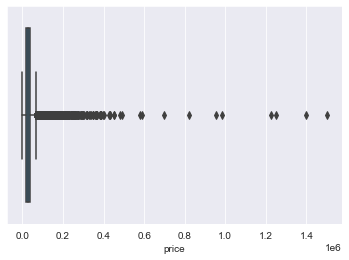

In [89]:
sns.boxplot(train_data["price"])

Removing outliers that cost more than 500K (only 3 in the df..)

In [90]:
len(train_data[train_data['price'] > 500000])

10

In [91]:
train_data.drop(train_data.loc[train_data['price']>500000].index, inplace=True)
test_data.drop(test_data.loc[test_data['price']>500000].index, inplace=True)
len(train_data[train_data['price'] > 500000])

0

In [92]:
train_data['price'].describe()

count    199510.000000
mean      29931.894020
std       18081.184558
min         200.000000
25%       18495.000000
50%       26500.000000
75%       38397.000000
max      489977.000000
Name: price, dtype: float64

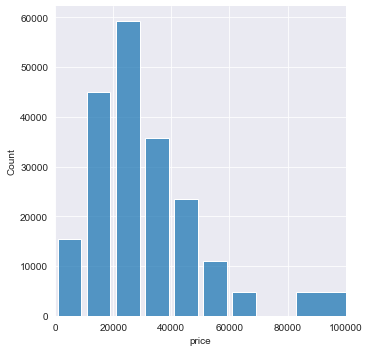

In [93]:
bins=[0,10000,20000,30000,40000,50000,60000,70000,200000]
sns.displot(train_data, x="price", bins=bins, shrink=.8)
plt.xlim(0, 100000)
plt.show()

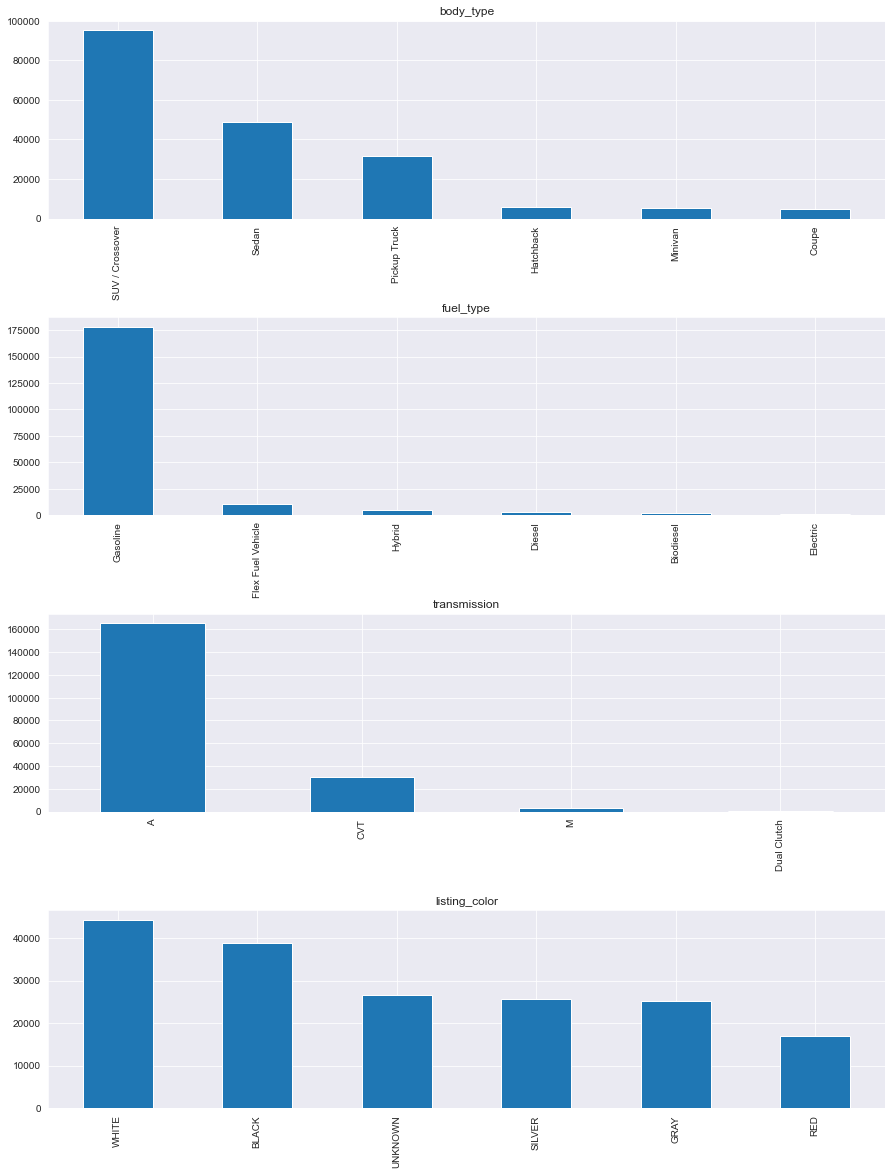

In [94]:
cols_to_graph = ['body_type', 'fuel_type', 'transmission','listing_color']
fig, axes = plt.subplots(4,figsize=(15,20))
fig.subplots_adjust(hspace=0.5)

#we will create a histogram for each categorical attribute
n=len(cols_to_graph)
max_bars = 6

for i,variable in enumerate(cols_to_graph):  
    #create the "value counts" for the first <max_bars> categories:
    u=min(train_data[variable].nunique(),max_bars)
    vc = train_data[variable].value_counts()[:u]
    
    # plot a bar chart using Pandas
    vc.plot(kind='bar',ax=axes[i],title=variable)


### Correlation

<AxesSubplot:xlabel='engine_displacement', ylabel='horsepower'>

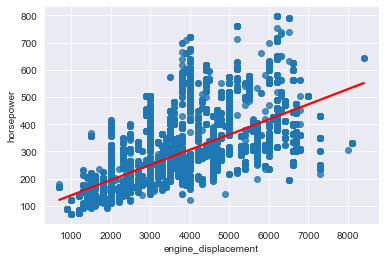

In [95]:
sns.regplot(data=train_data,x='engine_displacement',y='horsepower',line_kws={"color": "red"})

<AxesSubplot:xlabel='year', ylabel='owner_count'>

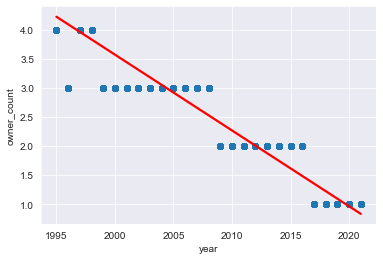

In [96]:
sns.regplot(data=train_data,x='year',y='owner_count',line_kws={"color": "red"})

<AxesSubplot:xlabel='owner_count', ylabel='price'>

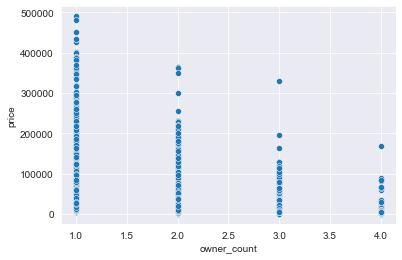

In [97]:
sns.scatterplot(data=train_data,x='owner_count',y='price')

<AxesSubplot:xlabel='horsepower', ylabel='city_fuel_economy'>

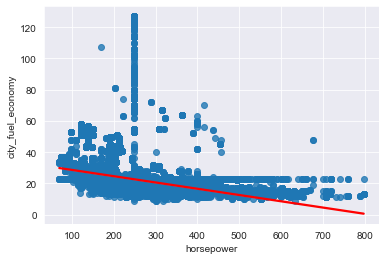

In [98]:
sns.regplot(data=train_data,x='horsepower',y='city_fuel_economy',line_kws={"color": "red"})

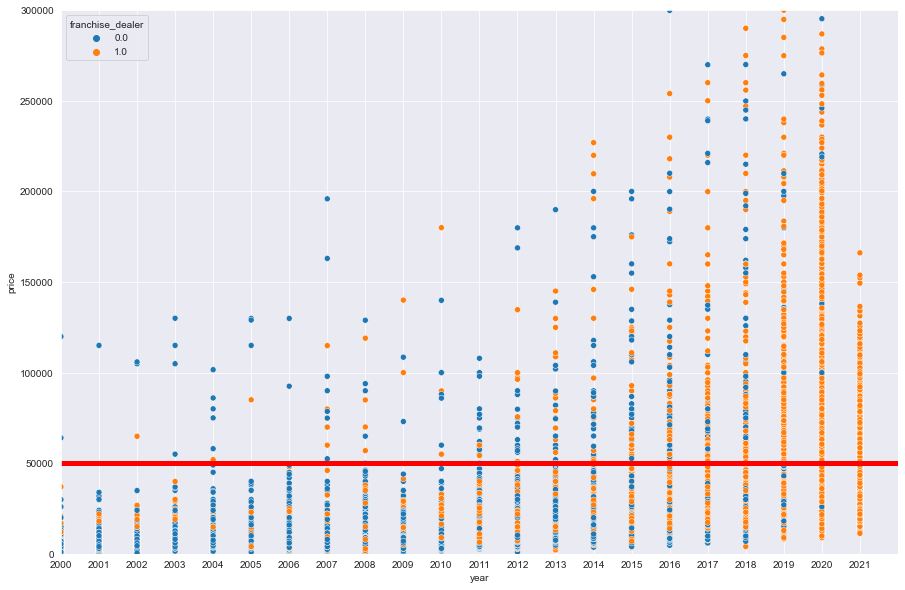

In [99]:
fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(data=train_data,x='year', y='price', hue='franchise_dealer', ax=ax)
plt.plot([2000,2022], [50000,50000], color='red', linewidth=5)
ax.set_xticks(np.arange(2000,2022,1))
plt.xlim(2000, 2022)
plt.ylim(0, 300000)
plt.show()

<AxesSubplot:>

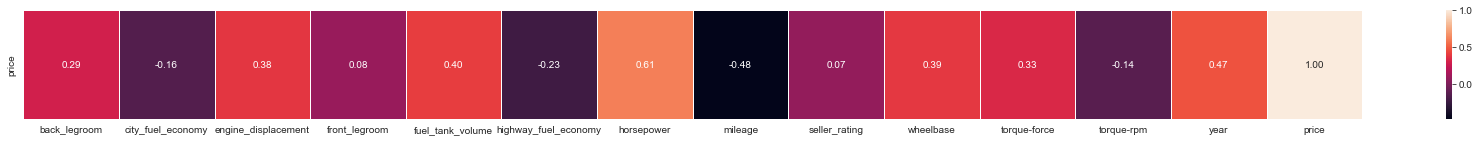

In [100]:
dtf_corr = train_data.corr(method="pearson").loc[["price"]]
fig, ax = plt.subplots(figsize=(30,2))

sns.heatmap(dtf_corr[numeric_variables], annot=True, fmt='.2f', cbar=True, linewidths=0.5,ax=ax)

### One Hot Encoding categorial data

In [101]:
oh_train = pd.DataFrame()
oh_test = pd.DataFrame()

for variable in binary_variables + numeric_variables:
    oh_train = pd.concat([oh_train,train_data[variable]],axis=1)
    oh_test = pd.concat([oh_test,test_data[variable]],axis=1)

for variable in categorical_variables:
    onehot_train_col = pd.get_dummies(train_data[variable],prefix=variable)
    oh_train = pd.concat([oh_train,onehot_train_col],axis=1)

    onehot_test_col = pd.get_dummies(test_data[variable],prefix=variable)
    oh_test = pd.concat([oh_test,onehot_test_col],axis=1)

In [102]:
add_to_test = list(set(oh_train.columns) - set(oh_test.columns))
add_to_train = list(set(oh_test.columns) - set(oh_train.columns))

for col in add_to_train:
    oh_train[col] = 0
for col in add_to_test:
    oh_test[col] = 0
oh_test=oh_test[oh_train.columns]

set(oh_test.columns) == set(oh_train.columns)

True

In [103]:
oh_train.shape

(199510, 1087)

Remove target column

In [104]:
x_train = oh_train.drop('price',axis=1)
x_test = oh_test.drop('price',axis=1)

y_train = oh_train['price']
y_test = np.array(oh_test['price'])

### XGBoost Model

In [110]:
from xgboost import XGBRegressor

# create an xgboost regression model
xgb_model_gblinear = XGBRegressor(booster='gblinear')
xgb_prediction_gblinear = xgb_model_gblinear.fit(x_train,y_train).predict(x_test)

from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_percentage_error,mean_absolute_error

print("R2 score: ",  r2_score(y_test, xgb_prediction_gblinear))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):","{:,.3f}".format(mean_absolute_percentage_error(y_test, xgb_prediction_gblinear)))
print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.0f}".format(mean_absolute_error(y_test, xgb_prediction_gblinear)))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.0f}".format(np.sqrt(mean_squared_error(y_test, xgb_prediction_gblinear))))

R2 score:  0.8453027175943593
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.220
Mean Absolute Error (Σ|y-pred|/n): 4,613
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 7,119


In [111]:
# residuals
residuals = y_test - xgb_prediction_gblinear
max_error = max(residuals) if abs(max(residuals)) > abs(min(residuals)) else min(residuals)
min_error = min(abs(residuals))
max_idx = list(residuals).index(max(residuals)) if abs(max(residuals)) > abs(min(residuals)) else list(residuals).index(min(residuals))
max_true, max_pred = y_test[max_idx], xgb_prediction_gblinear[max_idx]
print("Max Error:", "{:,.0f}".format(max_error))
print("Min Error:", "{:,.0f}".format(min_error))

Max Error: 219,349
Min Error: 0


### Error Analysis

In [113]:
print("XGB Model (gblinear) coefficients:\n")
coefs = []
for i in range(len(x_train.columns)):
    if not str(x_train.columns[i]).startswith(('model_name','make_name')):
        coefs.append((x_train.columns[i], xgb_model_gblinear.coef_[i].round(4)))
coefs.sort(key = lambda x: abs(x[1]), reverse=True)
coefs

XGB Model (gblinear) coefficients:



[('engine_cylinders_W12 Flex Fuel Vehicle', -45725.7),
 ('engine_cylinders_W12', -45307.5),
 ('maximum_seating_9', -13551.2),
 ('owner_count_4', -12819.4),
 ('engine_cylinders_I2', 12227.2),
 ('maximum_seating_3', -11111.1),
 ('engine_cylinders_R2', 10377.5),
 ('owner_count_3', -8163.36),
 ('body_type_Convertible', 8113.95),
 ('engine_cylinders_V6 Biodiesel', 7894.26),
 ('engine_cylinders_V6 Hybrid', -7669.63),
 ('engine_cylinders_I6 Diesel', 7577.0),
 ('engine_cylinders_V10', -6973.15),
 ('engine_cylinders_V8 Hybrid', -6389.13),
 ('maximum_seating_6', -6257.46),
 ('body_type_Coupe', 6198.75),
 ('engine_cylinders_V8 Compressed Natural Gas', -5294.68),
 ('engine_cylinders_V8 Biodiesel', 5101.25),
 ('engine_cylinders_V12', 5026.9),
 ('listing_color_PINK', 4489.24),
 ('engine_cylinders_V8 Flex Fuel Vehicle', -4383.47),
 ('engine_cylinders_I4 Compressed Natural Gas', 4330.65),
 ('owner_count_2', -4148.53),
 ('engine_cylinders_I5 Diesel', 4133.13),
 ('maximum_seating_10', -3773.01),
 ('engi

#### Note some odd coefs:
    year = -0.4769
Too low.

    listing_color_UNKNOWN = 352.142
Unexpected.

Permutation explainer: 501it [01:41,  4.54it/s]                         


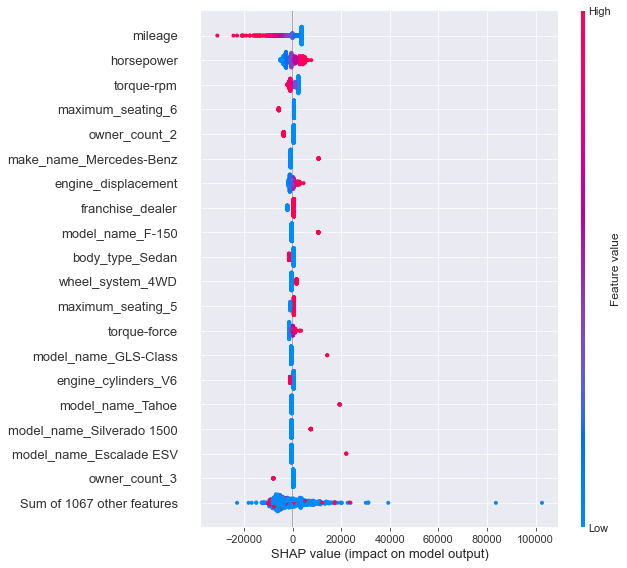

In [114]:
import shap
shap_sample = x_train.sample(500)
explainer = shap.Explainer(xgb_model_gblinear.predict, shap_sample)
shap_values = explainer(shap_sample, max_evals=500)
shap.plots.beeswarm(shap_values, max_display=20)

We notice that mileage horsepower and torque are the most important features
The higher the mileage, the lower the price
The higher the horsepower, the higher the price

In [115]:
test_data['residuals'] = residuals

In [116]:
test_data.sort_values('residuals', ascending=True)

,torque-rpm,torque-force,Elite Package,Luxury Ride Suspension Package,Premium 2 Package,Performance Handling Package,802A Luxury Equipment Group,Dual Rear Wheels,P01 Premium Package,Safety Package,Skid Plate Package,Remote Start,Standard Suspension Package,Value Package,Technology Package,Lariat Package,LS Package,Premium Package,Rear Climate Package,Ground Effects Package,Luxury Package,Preferred Package,AMG Sport Package,Smoker Package,Acoustical Package,Upgrade Package,Remote Vehicle Starter Prep Package,TRD Package,Limited Package,Ultimate Package,Cargo Package,Audio Package,301A Mid Equipment Group,Heated Seats,XLT Package,2lt Package,SL Package,Power Package,Bi Xenon Headlamp Package,P2 Package,RS Package,Customer Preferred Package,Quick Order Package,Storage Package,Blind Spot Monitoring,Sport Package,Chrome Wheels,Multimedia Package,Steel Wheels,Off Road Package,S Line Sport Package,Sport Chrono Package,Driver Confidence Package,Backup Camera,All-Wheel Steering,Special Edition Package,Extra Value Package,Adaptive Suspension,P1 Package,Carbon Ceramic Brakes,Ambient Light Package,Handicap Accessible,Tour Package,LT Package,Z 71 Package,Premium Audio Package,Trim Package,501A Mid Equipment Group,Tow Package,Performance Package,Z71 Package,Preferred Equipment Package,SLT Package,Premium Wheels,Security Package,DVD Entertainment System,Solid Smooth Ride Suspension Package,Alloy Wheels,S Line Package,King Ranch Package,Sunroof/Moonroof,LE Package,601A Luxury Equipment Group,Sound Package,101A Mid Equipment Group,Parking Sensors,Appearance Package,Third Row Seating,Bluetooth,Convenience Plus Package,Driver Assistance Package,Trailer Package,Navigation System,Adaptive Cruise Control,Bose High End Sound Package,CarPlay,Cold Weather Package,Autoride Suspension Package,Light Package,Premium 1 Package,Executive Package,Heat Package,Suspension Package,Winter Package,Premium Plus Package,Multi Zone Climate Control,SLE Package,302A Luxury Equipment Group,Popular Equipment Package,Preferred Accessory Package,M Sport Package,Premium Sound Package,SE Package,Quiet Package,Leather Seats,SR5 Package,Android Auto,Comfort Package,Ultra Luxury Package,Memory Package,Graphics Package,SXT Package,701A Luxury Equipment Group,Utility Package,XLE Package,Convenience Package,SR5 Grade Package,Wood Trim Package,5th Wheel,Premium Smooth Ride Suspension Package,Sport Activity Package,502A Luxury Equipment Group,Power Mirror Package,back_legroom,body_type,city_fuel_economy,engine_cylinders,engine_displacement,fleet,frame_damaged,franchise_dealer,front_legroom,fuel_tank_volume,fuel_type,has_accidents,highway_fuel_economy,horsepower,isCab,listing_color,make_name,maximum_seating,mileage,model_name,owner_count,price,salvage,seller_rating,theft_title,transmission,wheel_system,wheelbase,year,residuals
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1151689,1500.0,575.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42.300000,Sedan,13.000000,V12,6600.0,0.0,0.0,0.0,41.700000,21.8,Gasoline,0.0,21.000000,563.0,0.0,BLACK,Rolls-Royce,5,55204.0,Ghost,2,93990.0,0.0,4.500000,0.0,A,RWD,129.7,2013.0,-83705.312500
216294,3400.0,317.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,38.400000,Sedan,13.000000,V8,4200.0,0.0,0.0,0.0,41.300000,23.0,Gasoline,0.0,20.000000,360.0,0.0,SILVER,Audi,5,120857.0,S8,3,7450.0,0.0,4.833333,0.0,A,AWD,113.4,2002.0,-80111.328125
130836,3500.0,531.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

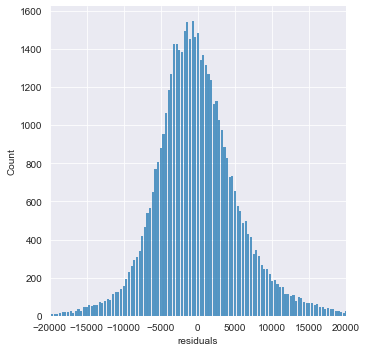

In [117]:
sns.displot(test_data, x="residuals", shrink=.8)
plt.xlim(-20000,20000)
plt.show()

In [118]:
test_data['residuals'].describe()

count     49879.000000
mean        -34.565156
std        7118.538281
min      -83705.312500
25%       -3543.657227
50%        -454.708984
75%        3061.962891
max      219349.296875
Name: residuals, dtype: float64

In [119]:
std = test_data['residuals'].describe()['std']

over_estimation = test_data[test_data['residuals'] > std].sort_values('residuals', ascending=False)
under_estimation = test_data[test_data['residuals'] < -std].sort_values('residuals', ascending=True)

In [120]:
under_estimation

,torque-rpm,torque-force,Elite Package,Luxury Ride Suspension Package,Premium 2 Package,Performance Handling Package,802A Luxury Equipment Group,Dual Rear Wheels,P01 Premium Package,Safety Package,Skid Plate Package,Remote Start,Standard Suspension Package,Value Package,Technology Package,Lariat Package,LS Package,Premium Package,Rear Climate Package,Ground Effects Package,Luxury Package,Preferred Package,AMG Sport Package,Smoker Package,Acoustical Package,Upgrade Package,Remote Vehicle Starter Prep Package,TRD Package,Limited Package,Ultimate Package,Cargo Package,Audio Package,301A Mid Equipment Group,Heated Seats,XLT Package,2lt Package,SL Package,Power Package,Bi Xenon Headlamp Package,P2 Package,RS Package,Customer Preferred Package,Quick Order Package,Storage Package,Blind Spot Monitoring,Sport Package,Chrome Wheels,Multimedia Package,Steel Wheels,Off Road Package,S Line Sport Package,Sport Chrono Package,Driver Confidence Package,Backup Camera,All-Wheel Steering,Special Edition Package,Extra Value Package,Adaptive Suspension,P1 Package,Carbon Ceramic Brakes,Ambient Light Package,Handicap Accessible,Tour Package,LT Package,Z 71 Package,Premium Audio Package,Trim Package,501A Mid Equipment Group,Tow Package,Performance Package,Z71 Package,Preferred Equipment Package,SLT Package,Premium Wheels,Security Package,DVD Entertainment System,Solid Smooth Ride Suspension Package,Alloy Wheels,S Line Package,King Ranch Package,Sunroof/Moonroof,LE Package,601A Luxury Equipment Group,Sound Package,101A Mid Equipment Group,Parking Sensors,Appearance Package,Third Row Seating,Bluetooth,Convenience Plus Package,Driver Assistance Package,Trailer Package,Navigation System,Adaptive Cruise Control,Bose High End Sound Package,CarPlay,Cold Weather Package,Autoride Suspension Package,Light Package,Premium 1 Package,Executive Package,Heat Package,Suspension Package,Winter Package,Premium Plus Package,Multi Zone Climate Control,SLE Package,302A Luxury Equipment Group,Popular Equipment Package,Preferred Accessory Package,M Sport Package,Premium Sound Package,SE Package,Quiet Package,Leather Seats,SR5 Package,Android Auto,Comfort Package,Ultra Luxury Package,Memory Package,Graphics Package,SXT Package,701A Luxury Equipment Group,Utility Package,XLE Package,Convenience Package,SR5 Grade Package,Wood Trim Package,5th Wheel,Premium Smooth Ride Suspension Package,Sport Activity Package,502A Luxury Equipment Group,Power Mirror Package,back_legroom,body_type,city_fuel_economy,engine_cylinders,engine_displacement,fleet,frame_damaged,franchise_dealer,front_legroom,fuel_tank_volume,fuel_type,has_accidents,highway_fuel_economy,horsepower,isCab,listing_color,make_name,maximum_seating,mileage,model_name,owner_count,price,salvage,seller_rating,theft_title,transmission,wheel_system,wheelbase,year,residuals
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1151689,1500.0,575.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42.300000,Sedan,13.000000,V12,6600.000000,0.0,0.0,0.0,41.700000,21.8,Gasoline,0.0,21.000000,563.000000,0.0,BLACK,Rolls-Royce,5,55204.0,Ghost,2,93990.0,0.0,4.500000,0.0,A,RWD,129.7,2013.0,-83705.312500
216294,3400.0,317.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,38.400000,Sedan,13.000000,V8,4200.000000,0.0,0.0,0.0,41.300000,23.0,Gasoline,0.0,20.000000,360.000000,0.0,SILVER,Audi,5,120857.0,S8,3,7450.0,0.0,4.833333,0.0,A,AWD,113.4,2002.0,-80111.328125
130836,3500.0,531.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [121]:
over_estimation

,torque-rpm,torque-force,Elite Package,Luxury Ride Suspension Package,Premium 2 Package,Performance Handling Package,802A Luxury Equipment Group,Dual Rear Wheels,P01 Premium Package,Safety Package,Skid Plate Package,Remote Start,Standard Suspension Package,Value Package,Technology Package,Lariat Package,LS Package,Premium Package,Rear Climate Package,Ground Effects Package,Luxury Package,Preferred Package,AMG Sport Package,Smoker Package,Acoustical Package,Upgrade Package,Remote Vehicle Starter Prep Package,TRD Package,Limited Package,Ultimate Package,Cargo Package,Audio Package,301A Mid Equipment Group,Heated Seats,XLT Package,2lt Package,SL Package,Power Package,Bi Xenon Headlamp Package,P2 Package,RS Package,Customer Preferred Package,Quick Order Package,Storage Package,Blind Spot Monitoring,Sport Package,Chrome Wheels,Multimedia Package,Steel Wheels,Off Road Package,S Line Sport Package,Sport Chrono Package,Driver Confidence Package,Backup Camera,All-Wheel Steering,Special Edition Package,Extra Value Package,Adaptive Suspension,P1 Package,Carbon Ceramic Brakes,Ambient Light Package,Handicap Accessible,Tour Package,LT Package,Z 71 Package,Premium Audio Package,Trim Package,501A Mid Equipment Group,Tow Package,Performance Package,Z71 Package,Preferred Equipment Package,SLT Package,Premium Wheels,Security Package,DVD Entertainment System,Solid Smooth Ride Suspension Package,Alloy Wheels,S Line Package,King Ranch Package,Sunroof/Moonroof,LE Package,601A Luxury Equipment Group,Sound Package,101A Mid Equipment Group,Parking Sensors,Appearance Package,Third Row Seating,Bluetooth,Convenience Plus Package,Driver Assistance Package,Trailer Package,Navigation System,Adaptive Cruise Control,Bose High End Sound Package,CarPlay,Cold Weather Package,Autoride Suspension Package,Light Package,Premium 1 Package,Executive Package,Heat Package,Suspension Package,Winter Package,Premium Plus Package,Multi Zone Climate Control,SLE Package,302A Luxury Equipment Group,Popular Equipment Package,Preferred Accessory Package,M Sport Package,Premium Sound Package,SE Package,Quiet Package,Leather Seats,SR5 Package,Android Auto,Comfort Package,Ultra Luxury Package,Memory Package,Graphics Package,SXT Package,701A Luxury Equipment Group,Utility Package,XLE Package,Convenience Package,SR5 Grade Package,Wood Trim Package,5th Wheel,Premium Smooth Ride Suspension Package,Sport Activity Package,502A Luxury Equipment Group,Power Mirror Package,back_legroom,body_type,city_fuel_economy,engine_cylinders,engine_displacement,fleet,frame_damaged,franchise_dealer,front_legroom,fuel_tank_volume,fuel_type,has_accidents,highway_fuel_economy,horsepower,isCab,listing_color,make_name,maximum_seating,mileage,model_name,owner_count,price,salvage,seller_rating,theft_title,transmission,wheel_system,wheelbase,year,residuals
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
110352,5250.0,434.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,37.996518,Convertible,9.000000,V12,5700.0,0.0,0.0,1.0,42.205427,27.0,Gasoline,0.0,15.000000,532.0,0.0,UNKNOWN,Ferrari,2,5018.0,Superamerica,3,319900.0,0.0,4.882353,0.0,M,RWD,98.4,2005.0,219349.296875
1553656,4750.0,354.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,37.996518,Coupe,22.696023,V8,4700.0,0.0,0.0,0.0,42.205427,23.3,Gasoline,0.0,29.484824,444.0,0.0,UNKNOWN,Alfa Romeo,2,14507.0,8C Competizione,3,249995.0,0.0,4.850000,0.0,A,RWD,104.1,2008.0,216640.562500
1540686,3000.0,567.0,0,0,0,0,0,0,0,0,0,0,0,0,

<AxesSubplot:>

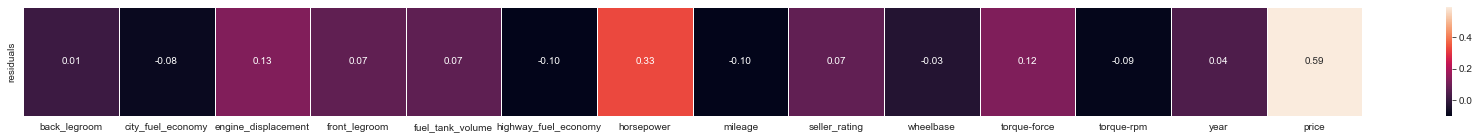

In [122]:
dtf_corr = over_estimation.corr(method="pearson").loc[["residuals"]]
fig, ax = plt.subplots(figsize=(30,2))

sns.heatmap(dtf_corr[numeric_variables], annot=True, fmt='.2f', cbar=True, linewidths=0.5,ax=ax)


<AxesSubplot:>

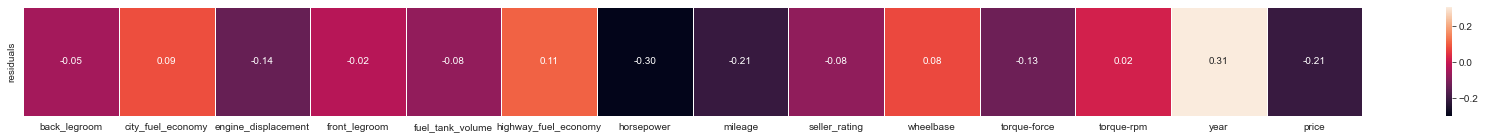

In [123]:
dtf_corr = under_estimation.corr(method="pearson").loc[["residuals"]]
fig, ax = plt.subplots(figsize=(30,2))

sns.heatmap(dtf_corr[numeric_variables], annot=True, fmt='.2f', cbar=True, linewidths=0.5,ax=ax)


### Dealing with colors
We saw that the model adds about 300$ to cars with unknown color for no reason, so we will try to extract those cars' colors out of their images

Using the extract_color_from_images.ipynb notebook, we extracted colors for cars whose listing_color feature was set as "UNKNOWN" in the dataset.
We filtered those cars, downloaded their images, removed the images background using image processing tools to recognize the cars' colors.
For the full procedure refer to the extract_color_from_images.ipynb notebook.

We will load the result of this procedure from file

In [161]:
cars_colors_df = pd.read_csv('./data/cars_colors.csv', index_col='id')
cars_colors_df['listing_color'].astype('category')

id
1954288       GRAY
289287        BLUE
1371871       GRAY
2100833    UNKNOWN
1891980       GRAY
            ...   
2788133    UNKNOWN
2039567    UNKNOWN
2989311    UNKNOWN
2844990    UNKNOWN
470723     UNKNOWN
Name: listing_color, Length: 27899, dtype: category
Categories (56, object): ['AZURE', 'BISQUE', 'BLACK', 'BLUE', ..., 'UNKNOWN', 'WHEAT', 'WHITE', 'YELLOW']

Add colors to train and test data

In [165]:
for row in cars_colors_df.itertuples():

    car_id = row.Index
    color = row.listing_color
    # print(car_id, color)
    if car_id in train_data.index:
        try:
            train_data.at[car_id, 'listing_color'] = color
        except:
            train_data['listing_color'] = train_data['listing_color'].cat.add_categories(color)
            train_data.at[car_id, 'listing_color'] = color
    if car_id in test_data.index:
        try:
            test_data.at[car_id, 'listing_color'] = color
        except:
            test_data['listing_color'] = test_data['listing_color'].cat.add_categories(color)
            test_data.at[car_id, 'listing_color'] = color

### Run model again after adding cars colors

In [172]:
# create an xgboost regression model
xgb_model_gblinear = XGBRegressor(booster='gblinear')
xgb_prediction_gblinear = xgb_model_gblinear.fit(x_train,y_train).predict(x_test)

from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_percentage_error,mean_absolute_error

print("R2 score: ",  r2_score(y_test, xgb_prediction_gblinear))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):","{:,.3f}".format(mean_absolute_percentage_error(y_test, xgb_prediction_gblinear)))
print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.0f}".format(mean_absolute_error(y_test, xgb_prediction_gblinear)))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.0f}".format(np.sqrt(mean_squared_error(y_test, xgb_prediction_gblinear))))

R2 score:  0.8452393554776946
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.220
Mean Absolute Error (Σ|y-pred|/n): 4,614
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 7,120


### Trying XGBRegressor without gblinear booster which seems to be better:

In [176]:
# create an xgboost regression model

skip_training = True

if not skip_training:
    xgb_model = XGBRegressor()
    model = xgb_model.fit(x_train, y_train)
    model.save_model('xgb_model.m')
else:
    model = XGBRegressor()
    model.load_model('xgb_model.m')


In [177]:
xgb_prediction = model.predict(x_test)

from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_percentage_error,mean_absolute_error

print("R2 score: ",  r2_score(y_test, xgb_prediction))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):","{:,.3f}".format(mean_absolute_percentage_error(y_test, xgb_prediction)))
print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.0f}".format(mean_absolute_error(y_test, xgb_prediction)))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.0f}".format(np.sqrt(mean_squared_error(y_test, xgb_prediction))))

# residuals
residuals = y_test - xgb_prediction
max_error = max(xgb_prediction) if abs(max(residuals)) > abs(min(residuals)) else min(residuals)
min_error = min(abs(xgb_prediction))
max_idx = list(residuals).index(max(residuals)) if abs(max(residuals)) > abs(min(residuals)) else list(residuals).index(min(residuals))
max_true, max_pred = y_test[max_idx], xgb_prediction[max_idx]
print("Max Error:", "{:,.0f}".format(max_error))
print("Min Error:", "{:,.0f}".format(min_error))

R2 score:  0.9337256753471863
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.110
Mean Absolute Error (Σ|y-pred|/n): 2,926
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 4,659
Max Error: 366,961
Min Error: 195
